In [ ]:
import numpy as np

In [ ]:
X_train=np.loadtxt('X_train.csv')
X_test=np.loadtxt('X_test.csv')
y_train=np.loadtxt('y_train.csv')
y_test=np.loadtxt('y_test.csv')

In [ ]:
X_train.shape

(100, 2)

In [ ]:
## 2 layers
## Mean Squared Error Loss
## Sigmoid Function hidden layer

In [ ]:
n_input=X_train.shape[1]
n_hidden=5
n_output=1
lr=0.0001
epochs=20

In [ ]:
W1=np.random.rand(n_input,n_hidden)
b1=np.zeros((1,n_hidden))

W2=np.random.rand(n_hidden,n_output)
b2=np.zeros((n_output,1))

In [ ]:
def sigmoid(Z):
    return 1/(1+np.exp(-Z))

In [ ]:
def MSE(Y,Y_pred):
    return ((Y - Y_pred)**2).mean()
    

In [ ]:
losses=[]
for epoch in range(epochs):

    ## Feed Forward Step
    Z1=X_train.dot(W1) + b1
    A1=sigmoid(Z1)

    Z2=A1.dot(W2)+b2
    Y_pred=Z2.copy()
    loss=MSE(y_train,Y_pred)
    losses.append(loss)
    print(loss)
    
    ## Back Propagation
    dfLoss_A1= 2*W2.dot(((A1.dot(W2)+b2).ravel()  - y_train).reshape(1,-1))
    dfA1_W1=X_train.T.dot(sigmoid(X_train.dot(W1) + b1).dot((1-sigmoid(X_train.dot(W1) + b1).T)))
    dfLoss_W1 = dfA1_W1.dot(dfLoss_A1.T)   #2,6



    dfA1_b1=(sigmoid(X_train.dot(W1) + b1).dot((1-sigmoid(X_train.dot(W1) + b1).T))).sum(1)

    dfLoss_b1 = dfLoss_A1.dot(dfA1_b1) 
    dfLoss_W2 = 2*A1.T.dot((A1.dot(W2)+b2).ravel()  - y_train).reshape(-1,1)
    dfLoss_b2 = 2*((A1.dot(W2)+b2).ravel() - y_train).sum()

    W1=W1 - lr*dfLoss_W1
    W2=W2 - lr*dfLoss_W2
    b1=b1-lr*dfLoss_b1
    b2=b2 -lr*dfLoss_b2

5692.5727593444335
5665.992979450079
5662.885403192926
5660.478895467027
5658.615295300876
5657.172122825533
5656.054529619832
5655.189065057367
5654.51884896535
5653.999833331383
5653.597907369041
5653.286655680466
5653.045622177394
5652.858965661477
5652.714418705608
5652.6024814115435
5652.515797055748
5652.448668589489
5652.396684216459
5652.35642744006


In [ ]:
# 1. The activation function used on the output layer is linear, since the outputs can be positive or negative for the regression task.
# 2. There is only one neuron that predicts the output in the continuos range.
# 3. MSE: 5252, there is no accuracy since this is a regression task
# 4. Plot below
# 5. The larger the learning rate, the model does not converge to a minimum MSE. The model diverges.
# 6. With 1 neuron, the model performs worse, the MSE is larger. As we increase the number of neurons, we see that the model performs better.

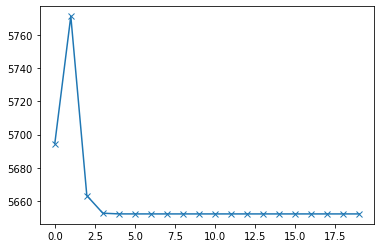

In [ ]:
## Learning Rate = 0.001
import matplotlib.pyplot as plt
plt.plot(losses,marker='x')

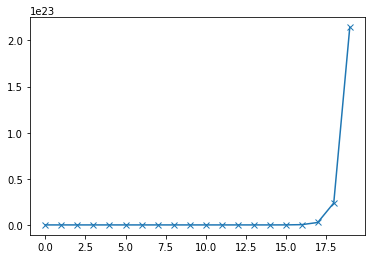

In [ ]:
## Learning Rate = 0.01
import matplotlib.pyplot as plt
plt.plot(losses,marker='x')